<a href="https://colab.research.google.com/github/shivamarora1209/BasicHTMLProject/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import copy
import math
%matplotlib inline

In [ ]:
data = pd.read_csv("Salary_Data.csv")
X_train = data.iloc[:, :-1]
Y_train = data.iloc[:, 1]

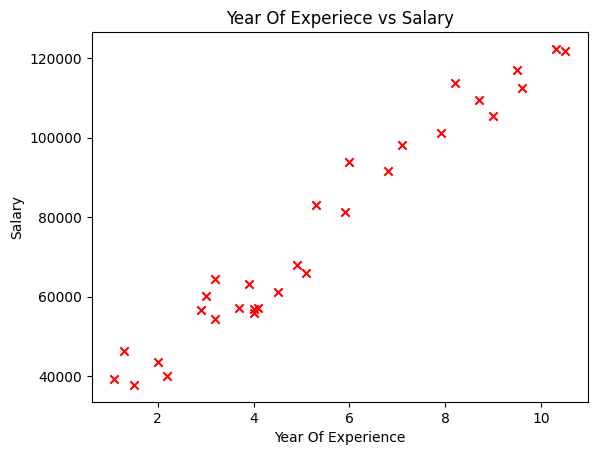

In [ ]:
plt.scatter(X_train, Y_train, marker='x', c= 'r')
plt.title("Year Of Experiece vs Salary")
plt.ylabel('Salary')
plt.xlabel('Year Of Experience')
plt.show()

In [ ]:
def compute_cost(x, y, w, b):
  m = x.shape[0]
  total_cost = 0

  for i in range(m):
    fwb = x.iloc[i]*w + b
    total_cost += (fwb - y[i])**2

  total_cost = total_cost/(2*m)

  return total_cost

In [ ]:
def compute_gradient(x, y, w, b) :
  m = x.shape[0]

  dj_dw = 0
  dj_db = 0

  for i in range(m):
    fwb = x.iloc[i]*w + b
    dj_dw += (fwb - y[i]) * x.iloc[i]
    dj_db += (fwb - y[i])

  dj_dw = dj_dw / m
  dj_db = dj_db / m

  return dj_dw, dj_db

In [ ]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    m = len(x)

    J_history = []
    w_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(x, y, w, b )
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i<100000:
            cost =  cost_function(x, y, w, b)
            J_history.append(cost)

        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b, J_history, w_history

In [ ]:
initial_w = 0.
initial_b = 0.

iterations = 1500
alpha = 0.01

w, b,_,_ = gradient_descent(X_train, Y_train, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent: ", w, b)

<ipython-input-7-0039ff55db12>:20: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")


Iteration    0: Cost 1344612525.84   
Iteration  150: Cost 48111733.18   
Iteration  300: Cost 32841618.72   
Iteration  450: Cost 24751407.82   
Iteration  600: Cost 20465158.85   
Iteration  750: Cost 18194274.89   
Iteration  900: Cost 16991145.05   
Iteration 1050: Cost 16353718.66   
Iteration 1200: Cost 16016005.80   
Iteration 1350: Cost 15837083.22   
w,b found by gradient descent:  YearsExperience    9597.791053
Name: 0, dtype: float64 YearsExperience    24796.021613
Name: 0, dtype: float64


In [ ]:
m = X_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * X_train.iloc[i] + b

<ipython-input-9-52fc6c5a0677>:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  predicted[i] = w * X_train.iloc[i] + b


Text(0.5, 0, 'Population of City in 10,000s')

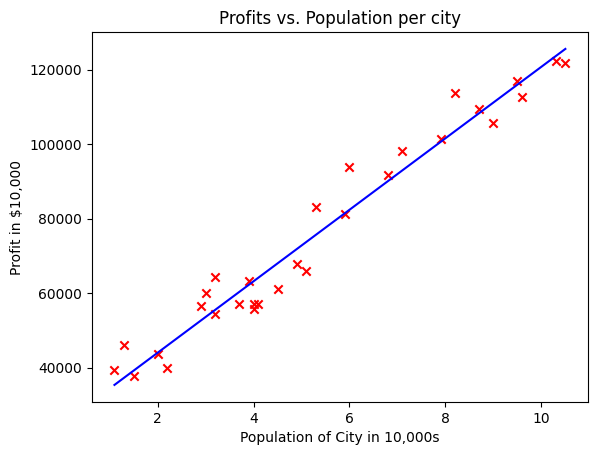

In [ ]:
plt.plot(X_train, predicted, c = "b")

plt.scatter(X_train, Y_train, marker='x', c='r')
plt.title("Year Of Experiece vs Salary")
plt.ylabel('Salary')
plt.xlabel('Year Of Experience')